**Title: Create a Notebook Related to Topic Covered in Class**

**Objective:**

The objective of this assignment is to help students understand the importance of data quality for machine learning, particularly focusing on data cleaning ,data profiling, data normalization, handling missing data and imputation techniques. Through a motivating example, students will learn to apply their knowledge and create a practical notebook that demonstrates their proficiency in ensuring high-quality data for machine learning tasks.

**Topics Covered:**

Data Quality Techniques, Data Cleaning techniques, Data Profiling, Data Normalization, Probability Distribution, Handling Missing Data And imputation techniques


**Topic Explained : Data Cleaning techniques**

This notebook emphasizes the vital role of data cleaning in machine learning. I've delved deep into data cleaning techniques, learning to identify and rectify anomalies, inconsistencies, and outliers. Created a notebook showcasing their proficiency in ensuring pristine data for machine learning. The notebook highlights the significance of data cleaning as a foundational step for accurate and reliable machine learning models, providing me with practical skills to enhance data quality.

In [1]:
!pip install eli5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score, calinski_harabasz_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import r2_score

Loading Dataset:

Source: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/

# About Dataset

**Context**
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

**Data Description**
7043 observations with 33 variables

1. CustomerID: A unique ID that identifies each customer.
2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
3. Country: The country of the customer’s primary residence.
4. State: The state of the customer’s primary residence.
5. City: The city of the customer’s primary residence.
6. Zip Code: The zip code of the customer’s primary residence.
7. Lat Long: The combined latitude and longitude of the customer’s primary residence.
8. Latitude: The latitude of the customer’s primary residence.
9. Longitude: The longitude of the customer’s primary residence.
10. Gender: The customer’s gender: Male, Female
11. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
12. Partner: Indicate if the customer has a partner: Yes, No
13. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
14. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
15. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
16. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
17. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
18. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
19. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
20. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
21. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
22. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
23. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
24. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
25. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
26. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
27. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
28. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
29. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
30. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
31. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
32. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
33. Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# **Understanding Data Cleaning**

Data cleaning is an essential step in the data preprocessing phase of machine learning. It involves identifying and correcting (or removing) errors and inconsistencies in data to improve its quality. The goal is to make datasets accurate and uniform, which are vital for reliable analytical outcomes.

## **Key aspects of data cleaning include:**

* Handling Missing Values: Missing data can be handled by imputation (filling missing values with statistical measures like mean, median) or by removing the rows or columns with missing values.

* Dealing with Outliers: Outliers can significantly affect the results of data analysis and statistical modeling. They can be detected using various methods like IQR (Interquartile Range) and Z-scores and can be treated by trimming, capping, or transformation.

* Data Formatting: Ensuring consistent formats across the dataset, like date-time formats, decimal places, or categorical value representations.

* Data Normalization and Scaling: This involves scaling feature values to a standard range, crucial for models that are sensitive to input scales, like SVMs or neural networks.

* Handling Duplicates: Duplicate entries can lead to biased results and must be identified and removed.

* Error Correction: Identifying and correcting data entry errors or inconsistencies.

* Feature Engineering: Creating new features or modifying existing ones to improve model performance.

### **Loading the Dataset**

In [2]:
# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')

### **Exploratory Data Analysis (EDA)**

In [3]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
# Display the shape of the dataset
print("Dataset Shape:", data.shape)

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Data types of each column
print("\nData Types:")
print(data.dtypes)

Dataset Shape: (7043, 33)

Summary Statistics:
        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000

In [7]:
# Identifying numerical and categorical columns in the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

numerical_columns, categorical_columns

(['Count',
  'Zip Code',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Churn Value',
  'Churn Score',
  'CLTV'],
 ['CustomerID',
  'Country',
  'State',
  'City',
  'Lat Long',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Total Charges',
  'Churn Label',
  'Churn Reason'])

What is the most reason makes customers churn ?

### **Handling Missing Values**

Detect and handle missing data. If the dataset is large and missing data is minimal, rows with missing data can be dropped. Otherwise, consider imputation.

The reason of nulls and how to handle them?

In [8]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [9]:
# Categorizing missing values as 'Unknown'
data['Churn Reason'] = data['Churn Reason'].fillna('Unknown')

### **Data Formatting and Error Correction**

Ensuring that all data types are appropriate and consistent. Correct any evident errors in data entries.

Total Charges column has a object data type but it is numerical data, so let's change data type for this column.

In [10]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [11]:
# Get the number of columns of each data type
print(f"""Number of:

float features: {len(data.select_dtypes('float').columns)}
int features: {len(data.select_dtypes('int').columns)}
object features: {len(data.select_dtypes('object').columns)}
""")

Number of:

float features: 4
int features: 6
object features: 23



In [12]:
data_na = (data.isnull().sum() / len(data))
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'mean of nulls' :data_na, "number of nulls" : data[data_na.index].isna().sum()})
missing_data

,mean of nulls,number of nulls
Total Charges,0.001562,11


Churn Reason column

About 73%(5174) of Churn Reason column is missing data, But why?

In [13]:
data['Churn Label'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn Label, dtype: float64

You can see about 73% of customers have a Churn Label = No, so they don't need to have some Churn Reason.

We will drop this column becouse a general rule is that, if more than half of the data in a column is missing, it's better to drop.

Total Charges column

In [14]:
data[data['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,Unknown
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,Unknown
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,Unknown
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,Unknown
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,Unknown
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,Unknown
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,Unknown
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,Unknown
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,Unknown
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,Unknown


we have the number of months that the customer uses the service, Tenure Months, and Monthly Charges. we can replace null values with those calculated by monthly charges * tenure months

In [15]:
data['Total Charges'].fillna(data['Monthly Charges'] * data['Tenure Months'], inplace=True)

**The problem of Low and High Cardinality**

Low cordinality/Constant Column: A column that has the same value for every row in a dataset is often considered uninformative and can be a problem in data analysis or machine learning, as it doesn't provide any information.

High Cardinality: When each row in a dataset has a unique value. High cardinality features can present challenges for modeling, as they can lead to a large number of unique categories, which can make the data more difficult to work with.

The data has many constant features and columns with high cardinality problem.

Low cordinality columns:

* Count column
* Country column
* State column

High cordinality columns:

* CustomerID column.
* Zip Code column.

### **Handling Duplicates**

Checking for and remove duplicate records to ensure data integrity.


In [16]:
# check for duplicate customers
dups = data[data.duplicated(subset=['CustomerID'])==True]
print(f'{dups.shape[0]} duplicate CustomerIDs found')

0 duplicate CustomerIDs found


In [17]:
# Handling Duplicates
# Removing duplicates
data = data.drop_duplicates()

In [18]:
data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           21
dtype: int64

In [19]:
data.groupby(['Country','State']).size()

Country        State     
United States  California    7043
dtype: int64

All of customers are from the United States of America, California.

* Missing Values: All missing values have been addressed. The 'Churn Reason' column's missing values were categorized as 'Unknown', and the 'Total Charges' column was converted to a numeric type, filling any non-numeric entries with 0.

* Duplicates: The dataset was checked for duplicates, and any found were removed. It appears there were no duplicates as the entry count remains the same.

* Data Integrity: The dataset now maintains integrity with all columns having non-null values and appropriate data types.


### **Dealing with Outliers**

Using statistical methods to detect outliers. Decisions on handling outliers depend on their impact on the analysis.

We need to identify and handle outliers, especially in numerical columns like 'Monthly Charges', 'Total Charges', and 'Tenure Months'. The approach will depend on the specific columns.

* Identify Outliers: I use the Interquartile Range (IQR) method to identify outliers. The IQR is the difference between the 25th and 75th percentile of the data. Values that fall below or above 1.5 times the IQR from the quartiles are typically considered outliers.

* Visualize Outliers: A box plot is a great way to visualize outliers. It shows the distribution of the data and highlights the presence of outliers.

* Handle Outliers: Once identified, I can decide to either remove these outliers or cap them.

In [20]:
# Calculate the IQR for 'Monthly Charges'
q1 = data['Monthly Charges'].quantile(0.25)
q3 = data['Monthly Charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

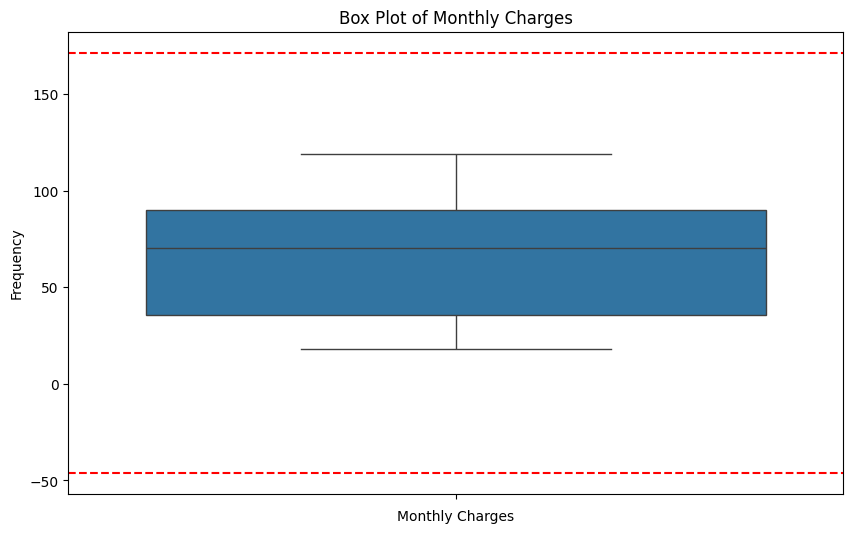

In [21]:
# Visualizing outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Monthly Charges'])
plt.axhline(lower_bound, color='r', linestyle='--')
plt.axhline(upper_bound, color='r', linestyle='--')
plt.title('Box Plot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

 As seen in the box plot, there are no data points beyond the whiskers, which indicates that there are no significant outliers in the 'Monthly Charges' data. This is a good sign that your data in this particular column is relatively clean and does not contain extreme values that could skew your analysis.

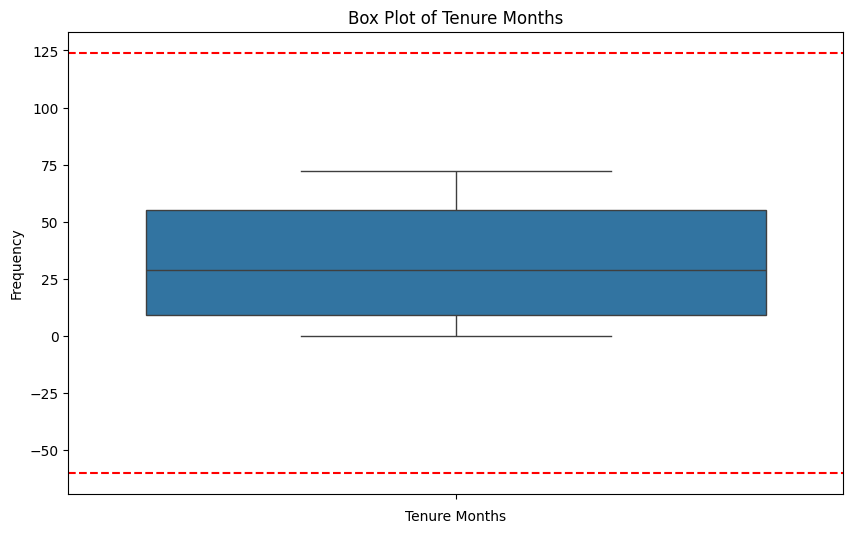

In [22]:
# Calculate the IQR for 'Tenure Months'
q1_tenure = data['Tenure Months'].quantile(0.25)
q3_tenure = data['Tenure Months'].quantile(0.75)
iqr_tenure = q3_tenure - q1_tenure
lower_bound_tenure = q1_tenure - 1.5 * iqr_tenure
upper_bound_tenure = q3_tenure + 1.5 * iqr_tenure

# Visualizing outliers using a box plot for 'Tenure Months'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Tenure Months'])
plt.axhline(lower_bound_tenure, color='r', linestyle='--')
plt.axhline(upper_bound_tenure, color='r', linestyle='--')
plt.title('Box Plot of Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')
plt.show()

Similar to the 'Monthly Charges' box plot, this visualization does not show any significant outliers for 'Tenure Months'. All data points are within the whiskers, indicating a distribution without extreme values on either the low or high end.

This consistency across different numerical columns suggests that this dataset is relatively clean with regard to outliers, which is beneficial for any subsequent data analysis or modeling you plan to perform.

In [23]:
outlier_columns = ['Total Charges', 'Churn Value', 'Churn Score', 'CLTV']
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if column not in ['Zip Code']:  # Exclude columns that are categorical but have numerical representation
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Check if any values fall outside of the lower and upper bounds
        if ((data[column] < lower_bound) | (data[column] > upper_bound)).any():
            outlier_columns.append(column)

outlier_columns

['Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

In [24]:
# Trying a smaller multiplier
outlier_columns = ['Total Charges', 'Churn Value', 'Churn Score', 'CLTV']
multiplier = 1.0  # Smaller multiplier to be more sensitive to outliers

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if column not in ['Zip Code']:  # Exclude non-quantitative numerical data
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (multiplier * iqr)
        upper_bound = q3 + (multiplier * iqr)

        # Check if any values fall outside of the lower and upper bounds
        if ((data[column] < lower_bound) | (data[column] > upper_bound)).any():
            outlier_columns.append(column)

outlier_columns

['Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Longitude',
 'Total Charges']

In [25]:
# Capping outliers at the upper bound for the 'Total Charges' column
q1 = data['Total Charges'].quantile(0.25)
q3 = data['Total Charges'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + (1.0 * iqr)

# Capping the outliers
data['Total Charges Capped'] = data['Total Charges'].apply(lambda x: min(x, upper_bound))


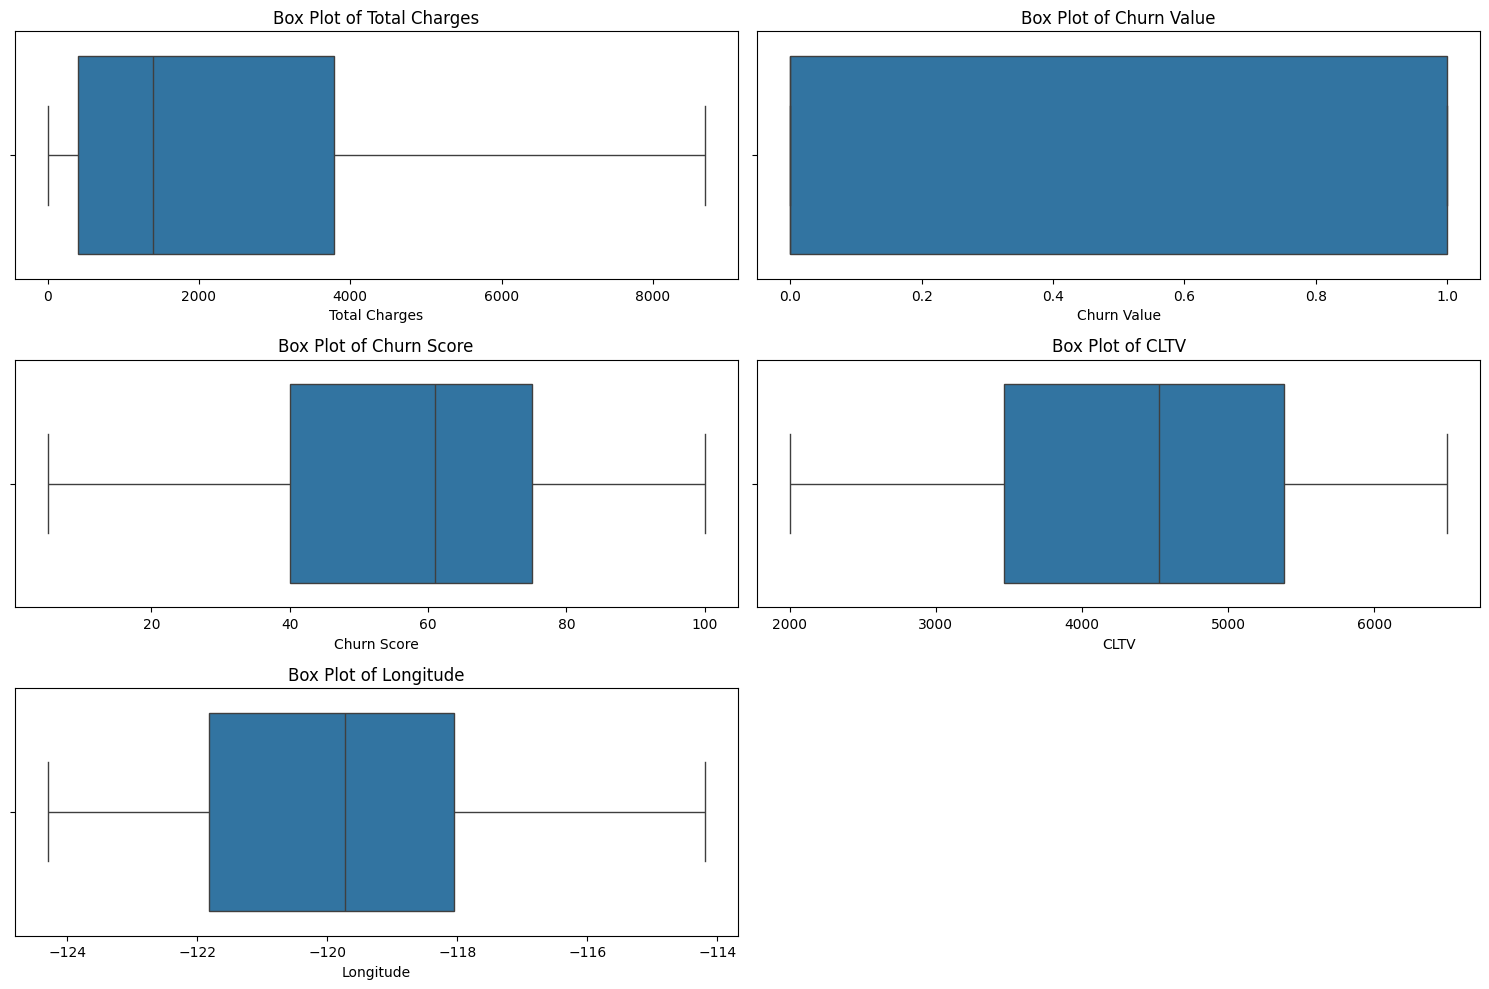

In [26]:
# List of columns identified with outliers
outlier_columns = ['Total Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Longitude']

# Plotting box plots for each column with outliers
plt.figure(figsize=(15, 10))

for index, column in enumerate(outlier_columns, start=1):
    plt.subplot(3, 2, index)  # Creating subplots for each box plot
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Total Charges: The plot suggests a right-skewed distribution with a few high-value outliers.

Churn Value: As this seems to be a binary column (probably with values 0 and 1), a box plot might not be very informative for outlier detection.

Churn Score: This column appears to have a fairly symmetric distribution with some potential outliers on both the lower and higher ends.

CLTV: This plot also indicates a right-skewed distribution with some high-value outliers.

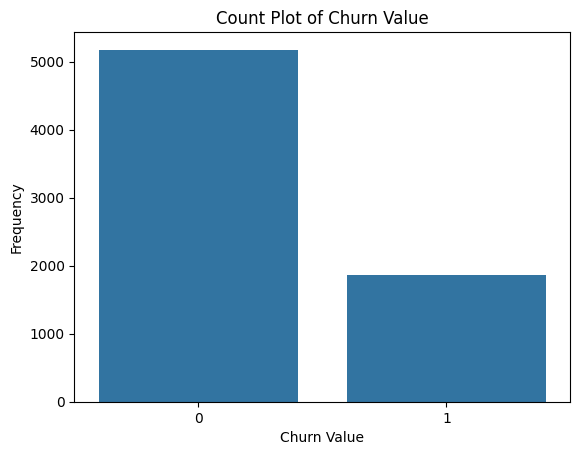

In [27]:
sns.countplot(x='Churn Value', data=data)
plt.title('Count Plot of Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('Frequency')
plt.show()

The plot shows the frequency distribution of the two categories:

'0' which likely represents customers who did not churn
'1' which likely represents customers who did churn

From the count plot, it appears that there are more customers in the dataset who did not churn ('0') compared to those who did ('1').

### **Feature Engineering**

Based on the EDA, deciding if new features need to be created or existing ones transformed to better capture the essence of the data.

Based on the EDA, we might consider creating new features or modifying existing ones to better capture the essence of the data. For example, creating a new feature that combines 'Phone Service' and 'Internet Service' into a single 'Service Type' feature.



One-Hot Encoding

Encoding the 'Gender' column.

In [28]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

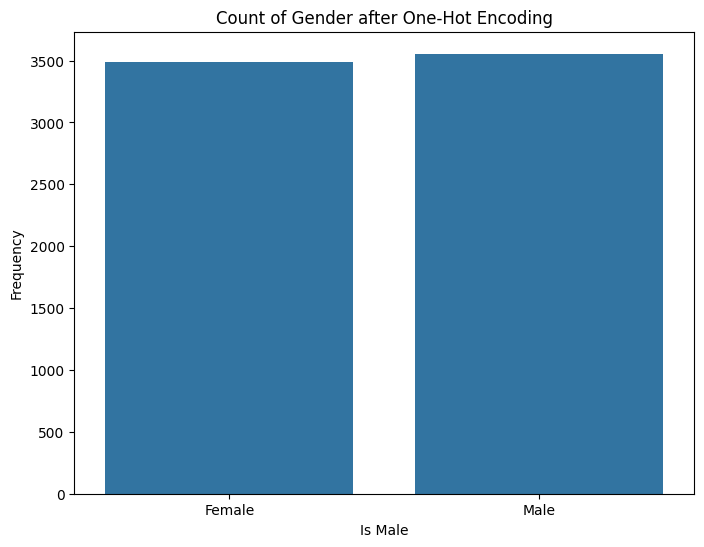

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Male', data=data)
plt.title('Count of Gender after One-Hot Encoding')
plt.xlabel('Is Male')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Female', 'Male'])  # Renaming the x-ticks for clarity
plt.show()

Binning can be used for both numerical and categorical data to group a set of numerical values into a smaller number of bins.

Binning 'Tenure Months' into 'New', 'Regular', 'Loyal' categories.

In [30]:
bins = [0, 12, 36, 60, 72]  # Defining the bins
group_names = ['New', 'Regular', 'Loyal', 'Very Loyal']
data['Tenure Groups'] = pd.cut(data['Tenure Months'], bins, labels=group_names)

This will create a new categorical variable 'Tenure Groups' that categorizes customers based on their tenure.

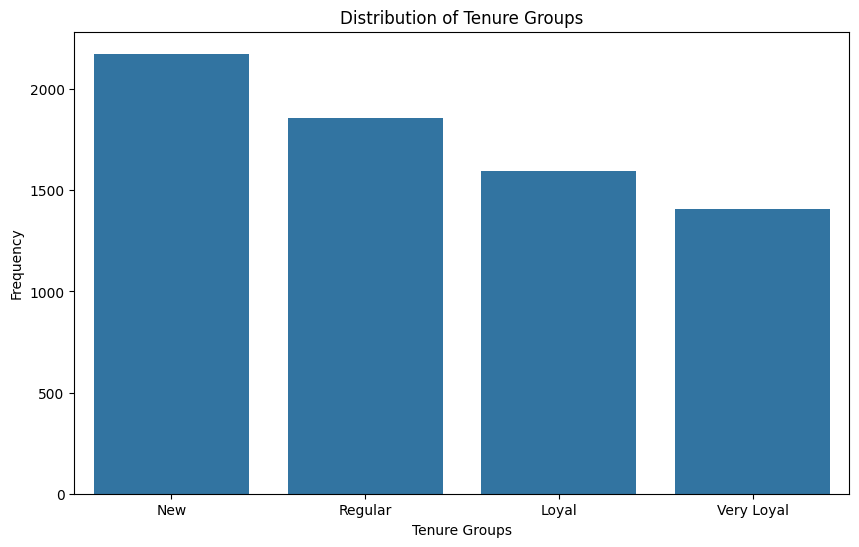

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure Groups', data=data, order=group_names)
plt.title('Distribution of Tenure Groups')
plt.xlabel('Tenure Groups')
plt.ylabel('Frequency')
plt.show()

Creating an interaction feature that combines 'Tenure Months' and 'Monthly Charges' to see if there's a combined effect on churn.

In [32]:
data['Tenure_MonthlyCharges'] = data['Tenure Months'] * data['Monthly Charges']

This new feature might capture the effect of higher charges over longer tenures on the likelihood to churn.

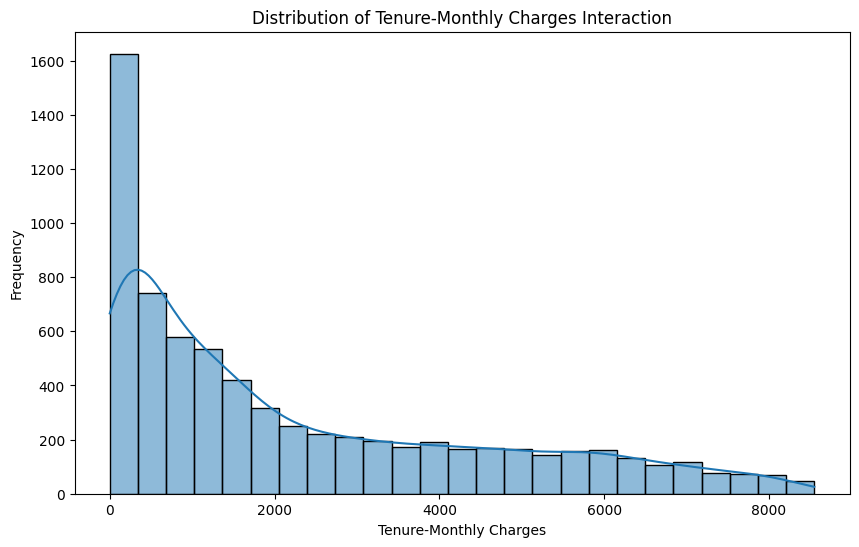

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Tenure_MonthlyCharges'], kde=True)
plt.title('Distribution of Tenure-Monthly Charges Interaction')
plt.xlabel('Tenure-Monthly Charges')
plt.ylabel('Frequency')
plt.show()

Creating features that summarize the central tendency of charges.

This feature represents the average 'Total Charges' for each 'Tenure Group'.

In [34]:
data['TotalCharges_mean'] = data.groupby('Tenure Groups')['Total Charges'].transform('mean')

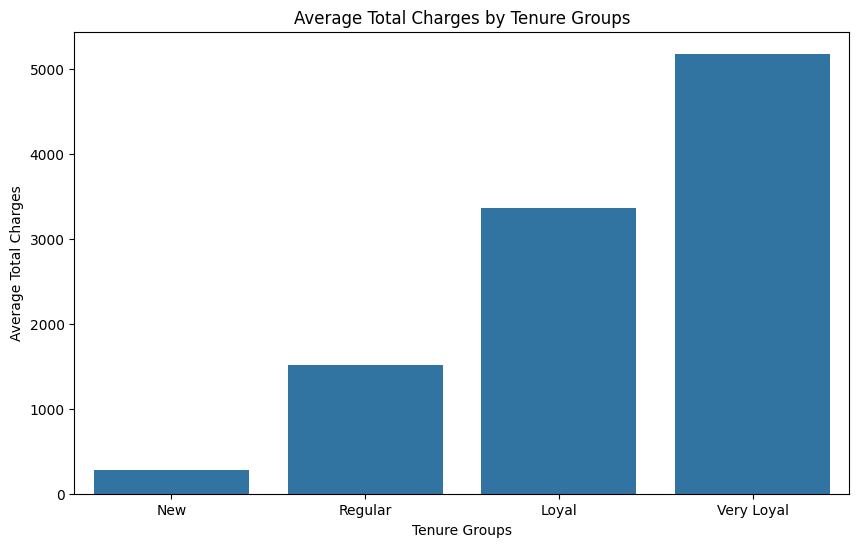

In [35]:
plt.figure(figsize=(10, 6))

# Since we want the mean 'Total Charges' for each 'Tenure Group', we can group by 'Tenure Groups' and then take the mean
# It's important to drop duplicates because each group will have multiple same entries for 'TotalCharges_mean'
mean_charges_by_group = data[['Tenure Groups', 'TotalCharges_mean']].drop_duplicates()

# Now, plot the bar chart
sns.barplot(x='Tenure Groups', y='TotalCharges_mean', data=mean_charges_by_group, order=group_names)
plt.title('Average Total Charges by Tenure Groups')
plt.xlabel('Tenure Groups')
plt.ylabel('Average Total Charges')
plt.show()

In [36]:
# Create a mapping for the categories
reason_mapping = {
    'Customer Service': ['customer service', 'service', 'support'],
    'Product/Network': ['product', 'network', 'quality'],
    'Pricing': ['price', 'cost', 'expensive'],
    'Moved': ['move', 'location', 'relocation'],
    'Unknown': ['unknown', 'unspecified', 'other']
}

# Function to map reasons to categories
def map_churn_reason(reason):
    for category, keywords in reason_mapping.items():
        for keyword in keywords:
            if keyword in str(reason).lower():
                return category
    return 'Unknown'  # Default to 'Unknown' if no match is found

# Create the new 'Churn Reason' column
data['Churn Reason'] = data['Churn Reason'].apply(map_churn_reason)

DataFrame 'data' will have a new column 'Churn Reason' with the specified categories

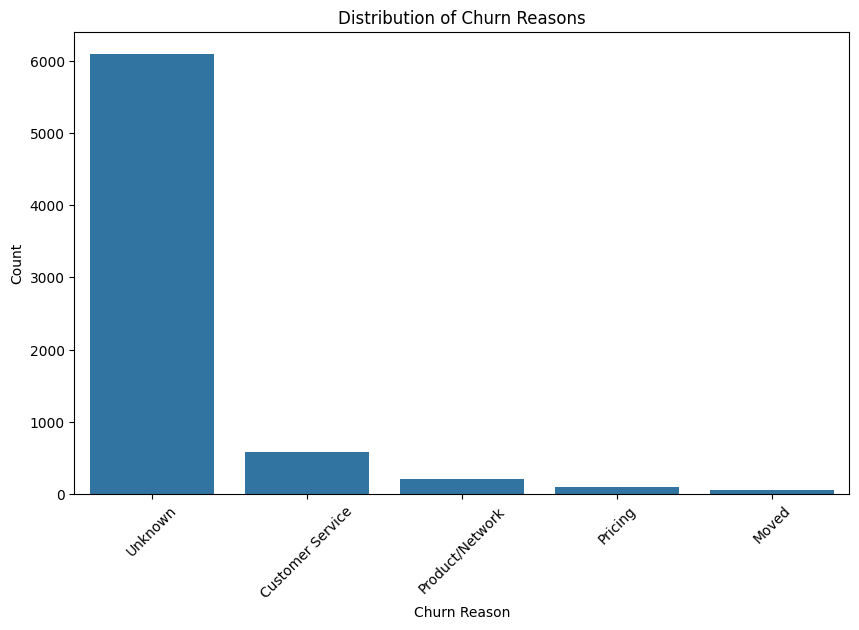

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Reason', data=data, order=data['Churn Reason'].value_counts().index)
plt.title('Distribution of Churn Reasons')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### **Data Normalization/Scaling**

Scale features, especially if using algorithms sensitive to feature scaling.

Data normalization (or scaling) is a preprocessing step where the range of numeric features in data is transformed to be on a similar scale. This step is particularly important for algorithms that compute distances between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), and algorithms that use gradient descent as an optimization technique, such as linear regression, logistic regression, and neural networks.

There are several common methods for scaling data:

* Min-Max Scaling (Normalization): This rescales the feature to a fixed range, usually 0 to 1.

* Standardization (Z-score Normalization): This rescales the feature to have a mean of 0 and a standard deviation of 1.

* Robust Scaling: This method uses the median and the interquartile range and is often used when there are outliers.

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'Monthly Charges' feature and transform it
data['MonthlyCharges_Scaled'] = scaler.fit_transform(data[['Monthly Charges']])


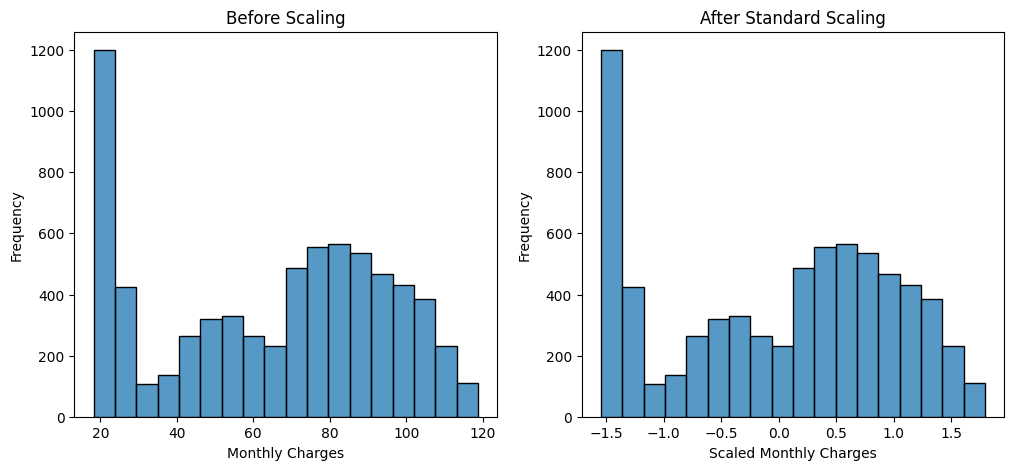

In [39]:
# Plotting the original vs scaled 'Monthly Charges' feature
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Original 'Monthly Charges'
sns.histplot(data['Monthly Charges'], ax=ax1)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Monthly Charges')
ax1.set_ylabel('Frequency')

# Scaled 'Monthly Charges'
sns.histplot(data['MonthlyCharges_Scaled'], ax=ax2)
ax2.set_title('After Standard Scaling')
ax2.set_xlabel('Scaled Monthly Charges')
ax2.set_ylabel('Frequency')

plt.show()

 Now 'Monthly Charges' is scaled such that it has mean 0 and standard deviation 1

In the "Before Scaling" histogram, the 'Monthly Charges' values are spread across the original range of the data. In the "After Standard Scaling" histogram, the same data has been transformed such that it has a mean of zero and a standard deviation of one. The shape of the distribution remains the same because standard scaling does not change the distribution's shape; it only changes the scale.

The frequency (y-axis) represents the number of occurrences within each bin of charges. Even after scaling, the number of observations in each bin remains the same, but the x-axis now reflects the number of standard deviations away from the mean (Z-scores).

**Robust Scaling**

Robust scaling is similar to standard scaling but uses the median and quartiles, instead of mean and standard deviation. This makes it more robust to outliers.

In [40]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
data['MonthlyCharges_RobustScaled'] = robust_scaler.fit_transform(data[['Monthly Charges']])

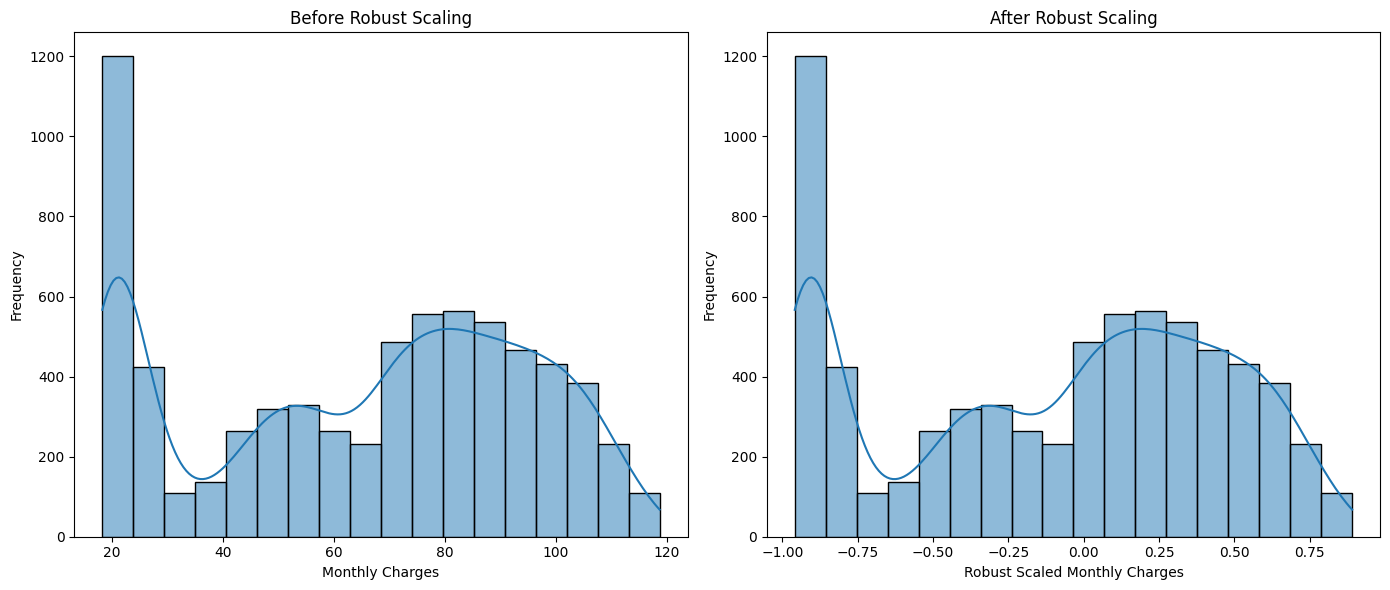

In [41]:
# Plotting the original and scaled 'Monthly Charges'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Original 'Monthly Charges' histogram
sns.histplot(data['Monthly Charges'], ax=ax1, kde=True)
ax1.set_title('Before Robust Scaling')
ax1.set_xlabel('Monthly Charges')
ax1.set_ylabel('Frequency')

# Robust Scaled 'Monthly Charges' histogram
sns.histplot(data['MonthlyCharges_RobustScaled'], ax=ax2, kde=True)
ax2.set_title('After Robust Scaling')
ax2.set_xlabel('Robust Scaled Monthly Charges')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In the "After Robust Scaling" histogram, the data has been transformed to center around the median (which is the 0 point in the robustly scaled data), and the spread is determined by the interquartile range (IQR). This scaling reduces the influence of outliers and can be particularly useful when your data contains many outliers.

The shape of the distribution remains similar, indicating that robust scaling does not affect the shape but only centers and scales the data based on the median and IQR, making the feature less sensitive to outliers than standard scaling. The robust scaling transformation makes it so that the feature's median is 0, and the IQR is between -1 and

**Log Transformation**

Applying a log transformation can help to stabilize the variance of a feature and make the distribution more Gaussian-like. It's especially useful for right-skewed data.

In [42]:
data['MonthlyCharges_Log'] = np.log1p(data['Monthly Charges'])  # log1p is used to handle zero values safely

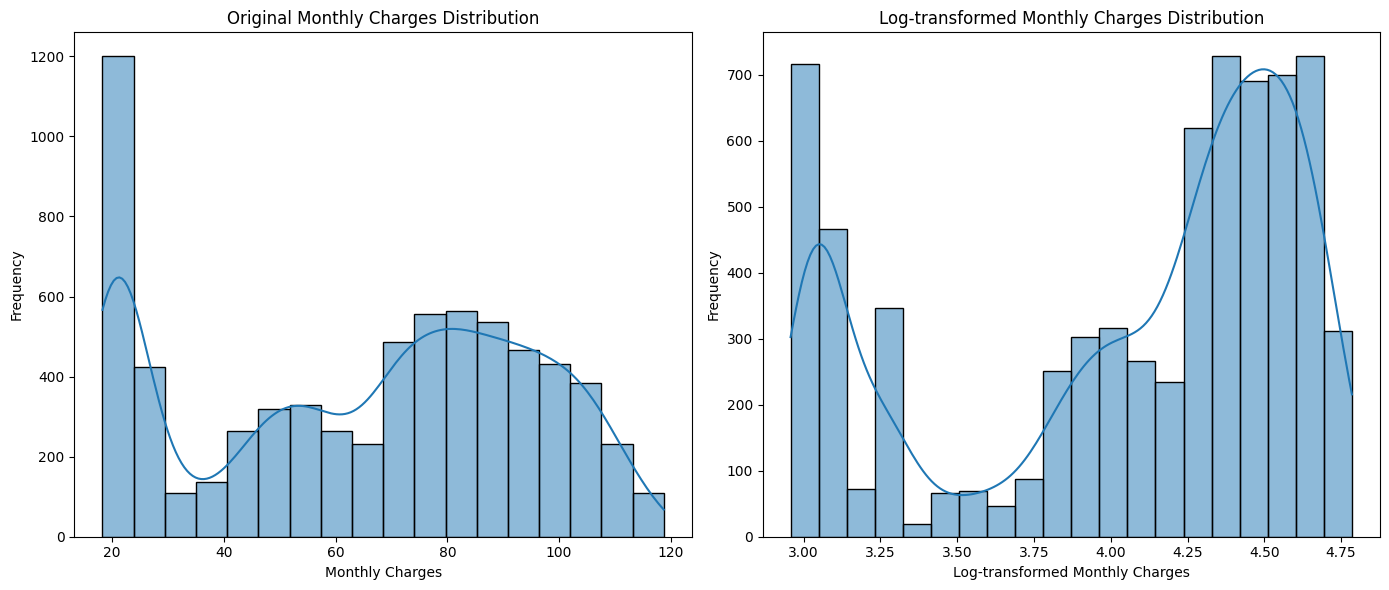

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Original 'Monthly Charges' histogram
sns.histplot(data['Monthly Charges'], ax=ax1, kde=True)
ax1.set_title('Original Monthly Charges Distribution')
ax1.set_xlabel('Monthly Charges')
ax1.set_ylabel('Frequency')

# Log-transformed 'Monthly Charges' histogram
sns.histplot(data['MonthlyCharges_Log'], ax=ax2, kde=True)
ax2.set_title('Log-transformed Monthly Charges Distribution')
ax2.set_xlabel('Log-transformed Monthly Charges')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histogram on the left shows the original distribution of 'Monthly Charges'. It is likely to be right-skewed, which is typical for financial data, where there are a bunch of normal or low values and fewer high values.

The histogram on the right displays the distribution after the log transformation. The log transformation is a powerful tool when dealing with right-skewed data as it can help to normalize the distribution and reduce the skewness. This is evident from the more bell-shaped distribution seen in the log-transformed histogram.

The log transformation is particularly useful because many machine learning algorithms assume that the features are normally distributed.

**Quantile Transformation**

This transformation transforms the features to follow a uniform or a normal distribution, therefore stabilizing the variance and minimizing the impact of outliers.

In [44]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
data['MonthlyCharges_QuantileTransformed'] = quantile_transformer.fit_transform(data[['Monthly Charges']])

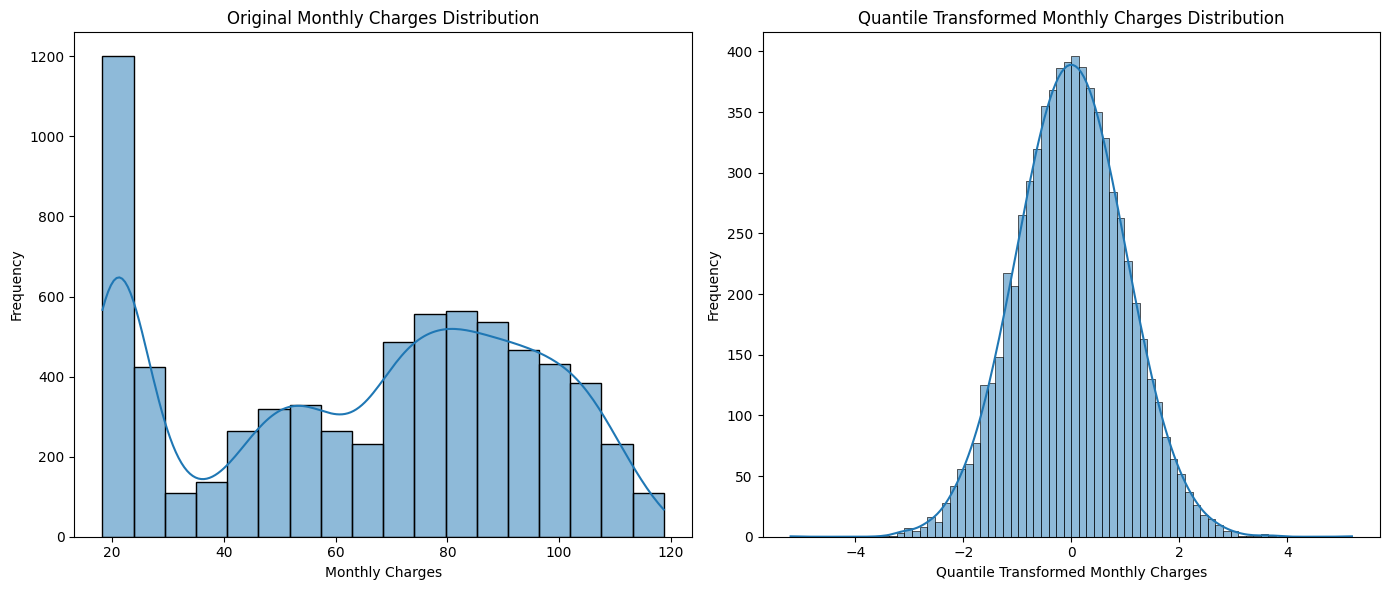

In [45]:
# Plotting the original and Quantile Transformed 'Monthly Charges'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Original 'Monthly Charges' histogram
sns.histplot(data['Monthly Charges'], ax=ax1, kde=True)
ax1.set_title('Original Monthly Charges Distribution')
ax1.set_xlabel('Monthly Charges')
ax1.set_ylabel('Frequency')

# Quantile Transformed 'Monthly Charges' histogram
sns.histplot(data['MonthlyCharges_QuantileTransformed'], ax=ax2, kde=True)
ax2.set_title('Quantile Transformed Monthly Charges Distribution')
ax2.set_xlabel('Quantile Transformed Monthly Charges')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

On the left, the "Original Monthly Charges Distribution" histogram displays the original distribution of 'Monthly Charges'. This distribution may have some skewness or non-normality.

On the right, the "Quantile Transformed Monthly Charges Distribution" histogram shows the distribution after applying the Quantile Transformation. This transformation aims to make the data follow a normal distribution. As you can see, the distribution on the right is more Gaussian-like, with values centered around 0 and a symmetrical shape.

The Quantile Transformation is useful when you want to transform your data to follow a specified distribution, in this case, a normal distribution.

Conclusion :

All customers in California, USA

City distribution is wide, < 10% in major cities. Likely rural telecom co. Explore other geographic attributes.

Data values look clean, no corrupt values or other NaNs to deal with.

**References :**

Utilizing ChatGPT for In-Depth Exploration : https://chat.openai.com/share/2a9092b8-edce-4cd3-bff2-f7b4d77f42e9

https://www.kaggle.com/code/tawfikelmetwally/customer-churn-analysis-plotly-visualization#Data-Review-and-Cleaning

**License**

Copyright 2024 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.